In [ ]:
#safe driving yolo


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 9.4 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11m.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 38.8M/38.8M [00:00<00:00, 53.8MB/s]


In [ ]:
#read csv file
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/datascience/driver_imgs_list.csv")

In [ ]:
df


subject classname            img
0        p002        c0  img_44733.jpg
1        p002        c0  img_72999.jpg
2        p002        c0  img_25094.jpg
3        p002        c0  img_69092.jpg
4        p002        c0  img_92629.jpg
...       ...       ...            ...
22419    p081        c9  img_56936.jpg
22420    p081        c9  img_46218.jpg
22421    p081        c9  img_25946.jpg
22422    p081        c9  img_67850.jpg
22423    p081        c9   img_9684.jpg

[22424 rows x 3 columns]

In [ ]:
print(df['subject'].unique())

['p002' 'p012' 'p014' 'p015' 'p016' 'p021' 'p022' 'p024' 'p026' 'p035' 'p039' 'p041' 'p042' 'p045' 'p047' 'p049' 'p050' 'p051' 'p052' 'p056' 'p061' 'p064' 'p066' 'p072' 'p075' 'p081']


In [ ]:
df.columns

Index(['subject', 'classname', 'img'], dtype='object')

In [ ]:

mapping = {
    'c0': 'safe driving',
    'c1': 'texting right',
    'c2': 'talking on the phone right',
    'c3': 'texting left',
    'c4': 'talking on the phone left',
    'c5': 'operating the radio',
    'c6': 'drinking',
    'c7': 'reaching behind',
    'c8': 'hair and makeup',
    'c9': 'talking to passenger',
}


In [ ]:
df2.unique()

array(['safe driving', 'texting right', 'talking on the phone right', 'texting left', 'talking on the phone left', 'operating the radio', 'drinking', 'reaching behind', 'hair and makeup', 'talking to passenger', 'p039', 'p041', 'p042', 'p045', 'p047', 'p049', 'p050', 'p051', 'p052', 'p056', 'p061', 'p064', 'p066',
       'p072', 'p075', 'p081'], dtype=object)

In [ ]:
print(os.path.exists(image_folder))  # Should return True


True


In [ ]:
!pip install split-folders
!pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.8 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
import os
import splitfolders
from IPython.display import display, Image

In [ ]:
splitfolders.ratio("/content/drive/MyDrive/datascience/imgs/train", output="output", seed=1337, ratio=(0.7, 0.15, 0.15))

Copying files: 22424 files [14:10, 26.37 files/s] 


In [ ]:
import os
import random
import shutil

# Paths to your dataset
train_dir = '/content/drive/MyDrive/datascience/imgs/train'  # Path to the 'train' folder
val_dir = '/content/drive/MyDrive/datascience/imgs/val'      # Path to the 'val' folder
split_ratio = 0.2            # 20% of the images will be used for validation

# Create val directory if it doesn't exist
if not os.path.exists(val_dir):
    os.makedirs(val_dir)

# Loop through each class folder in the train dataset
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)

    if os.path.isdir(class_path):  # Ensure it's a folder
        print(f"Processing class: {class_folder}")

        # Create the corresponding validation folder
        val_class_path = os.path.join(val_dir, class_folder)
        if not os.path.exists(val_class_path):
            os.makedirs(val_class_path)

        # Get all image files in the class folder
        image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

        # Shuffle the list to ensure random splitting
        random.shuffle(image_files)

        # Split the images based on the split ratio
        split_index = int(len(image_files) * split_ratio)
        val_images = image_files[:split_index]  # Select first 20% for validation
        train_images = image_files[split_index:]  # Remaining for training

        # Move images to the respective folders
        for img in val_images:
            shutil.move(os.path.join(class_path, img), os.path.join(val_class_path, img))

        print(f"Moved {len(val_images)} images from {class_folder} to validation set.")

print("Dataset split complete!")


Processing class: c0
Moved 497 images from c0 to validation set.
Processing class: c1
Moved 453 images from c1 to validation set.
Processing class: c2
Moved 463 images from c2 to validation set.
Processing class: c3
Moved 469 images from c3 to validation set.
Processing class: c4
Moved 465 images from c4 to validation set.
Processing class: c5
Moved 462 images from c5 to validation set.
Processing class: c6
Moved 465 images from c6 to validation set.
Processing class: c7
Moved 400 images from c7 to validation set.
Processing class: c8
Moved 382 images from c8 to validation set.
Processing class: c9
Moved 425 images from c9 to validation set.
Dataset split complete!


In [ ]:
modelclassification = YOLO("yolo11m-cls.pt")
results = modelclassification.train(data="/content/drive/MyDrive/datascience/imgs",epochs=25,imgsz=64)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolo11m-cls.pt, data=/content/drive/MyDrive/datascience/imgs, epochs=25, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 5.35M/5.35M [00:00<00:00, 102MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/datascience/imgs/train... 17943 images, 0 corrupt: 100%|██████████| 17943/17943 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/datascience/imgs/val... 4481 images, 0 corrupt: 100%|██████████| 4481/4481 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 49 weight(decay=0.0), 50 weight(decay=0.0005), 50 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/classify/train3
Starting training for 25 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/25     0.346G      2.385         16         64:   0%|          | 2/1122 [00:01<09:55,  1.88it/s]


100%|██████████| 755k/755k [00:00<00:00, 22.4MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [12:01<00:00,  5.12s/it]

                   all       0.91      0.994



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:35<00:00,  3.98it/s]

                   all      0.933      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:34<00:00,  4.14it/s]

                   all      0.938      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:35<00:00,  4.02it/s]

                   all      0.919      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:35<00:00,  3.97it/s]

                   all      0.969      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:35<00:00,  4.02it/s]

                   all      0.978      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:34<00:00,  4.10it/s]

                   all      0.979      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:34<00:00,  4.11it/s]

                   all      0.979      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:34<00:00,  4.12it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


      10/25     0.413G     0.2164          7         64: 100%|██████████| 1122/1122 [03:11<00:00,  5.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:35<00:00,  3.99it/s]

                   all      0.987      0.999



      Epoch    GPU_mem       loss  Instances       Size


      11/25     0.413G        0.2          7         64: 100%|██████████| 1122/1122 [03:10<00:00,  5.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:35<00:00,  3.93it/s]

                   all       0.99      0.999



      Epoch    GPU_mem       loss  Instances       Size


      12/25     0.413G     0.1912          7         64: 100%|██████████| 1122/1122 [03:20<00:00,  5.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:34<00:00,  4.04it/s]

                   all       0.99      0.999



      Epoch    GPU_mem       loss  Instances       Size


      13/25     0.413G     0.1749          7         64: 100%|██████████| 1122/1122 [05:44<00:00,  3.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:35<00:00,  3.95it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


      14/25     0.413G     0.1587          7         64: 100%|██████████| 1122/1122 [03:16<00:00,  5.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:34<00:00,  4.08it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


      15/25     0.413G     0.1451          7         64: 100%|██████████| 1122/1122 [03:17<00:00,  5.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:34<00:00,  4.07it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


      16/25     0.413G     0.1387          7         64: 100%|██████████| 1122/1122 [03:20<00:00,  5.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:34<00:00,  4.05it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


      17/25     0.413G     0.1203          7         64: 100%|██████████| 1122/1122 [03:20<00:00,  5.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:36<00:00,  3.84it/s]

                   all      0.994      0.999



      Epoch    GPU_mem       loss  Instances       Size


      18/25     0.413G     0.1162          7         64: 100%|██████████| 1122/1122 [03:18<00:00,  5.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:35<00:00,  3.98it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      19/25     0.413G     0.1097          7         64: 100%|██████████| 1122/1122 [03:13<00:00,  5.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:34<00:00,  4.14it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      20/25     0.413G    0.09773          7         64: 100%|██████████| 1122/1122 [03:20<00:00,  5.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:35<00:00,  4.01it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      21/25     0.413G    0.09003          7         64: 100%|██████████| 1122/1122 [03:13<00:00,  5.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:34<00:00,  4.07it/s]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


      22/25     0.413G    0.08005          7         64: 100%|██████████| 1122/1122 [03:13<00:00,  5.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:34<00:00,  4.06it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      23/25     0.413G    0.07215          7         64: 100%|██████████| 1122/1122 [03:11<00:00,  5.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:35<00:00,  4.03it/s]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


      24/25     0.413G    0.06986          7         64: 100%|██████████| 1122/1122 [03:16<00:00,  5.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:33<00:00,  4.18it/s]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


      25/25     0.413G    0.06738          7         64: 100%|██████████| 1122/1122 [03:13<00:00,  5.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:35<00:00,  3.97it/s]

                   all      0.996          1



25 epochs completed in 2.738 hours.
Optimizer stripped from runs/classify/train3/weights/last.pt, 20.9MB
Optimizer stripped from runs/classify/train3/weights/best.pt, 20.9MB

Validating runs/classify/train3/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m-cls summary (fused): 138 layers, 10,354,442 parameters, 0 gradients, 39.3 GFLOPs
train: /content/drive/MyDrive/datascience/imgs/train... found 17943 images in 10 classes ✅ 
val: /content/drive/MyDrive/datascience/imgs/val... found 4481 images in 10 classes ✅ 
test: /content/drive/MyDrive/datascience/imgs/test... found 79726 images in 1 classes: ERROR ❌️ requires 10 classes, not 1


               classes   top1_acc   top5_acc: 100%|██████████| 141/141 [00:54<00:00,  2.61it/s]


                   all      0.996          1
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3


In [ ]:
results.save()

AttributeError: 'ClassifyMetrics' object has no attribute 'save'. See valid attributes below.

    Class for computing classification metrics including top-1 and top-5 accuracy.

    Attributes:
        top1 (float): The top-1 accuracy.
        top5 (float): The top-5 accuracy.
        speed (Dict[str, float]): A dictionary containing the time taken for each step in the pipeline.
        fitness (float): The fitness of the model, which is equal to top-5 accuracy.
        results_dict (Dict[str, Union[float, str]]): A dictionary containing the classification metrics and fitness.
        keys (List[str]): A list of keys for the results_dict.

    Methods:
        process(targets, pred): Processes the targets and predictions to compute classification metrics.
    

In [ ]:
results_path = '/content/drive/MyDrive/datascience/runs/classify/train3/results.csv'
datastat = pd.read_csv(results_path)
datastat.columns

Index(['epoch', 'time', 'train/loss', 'metrics/accuracy_top1',
       'metrics/accuracy_top5', 'val/loss', 'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

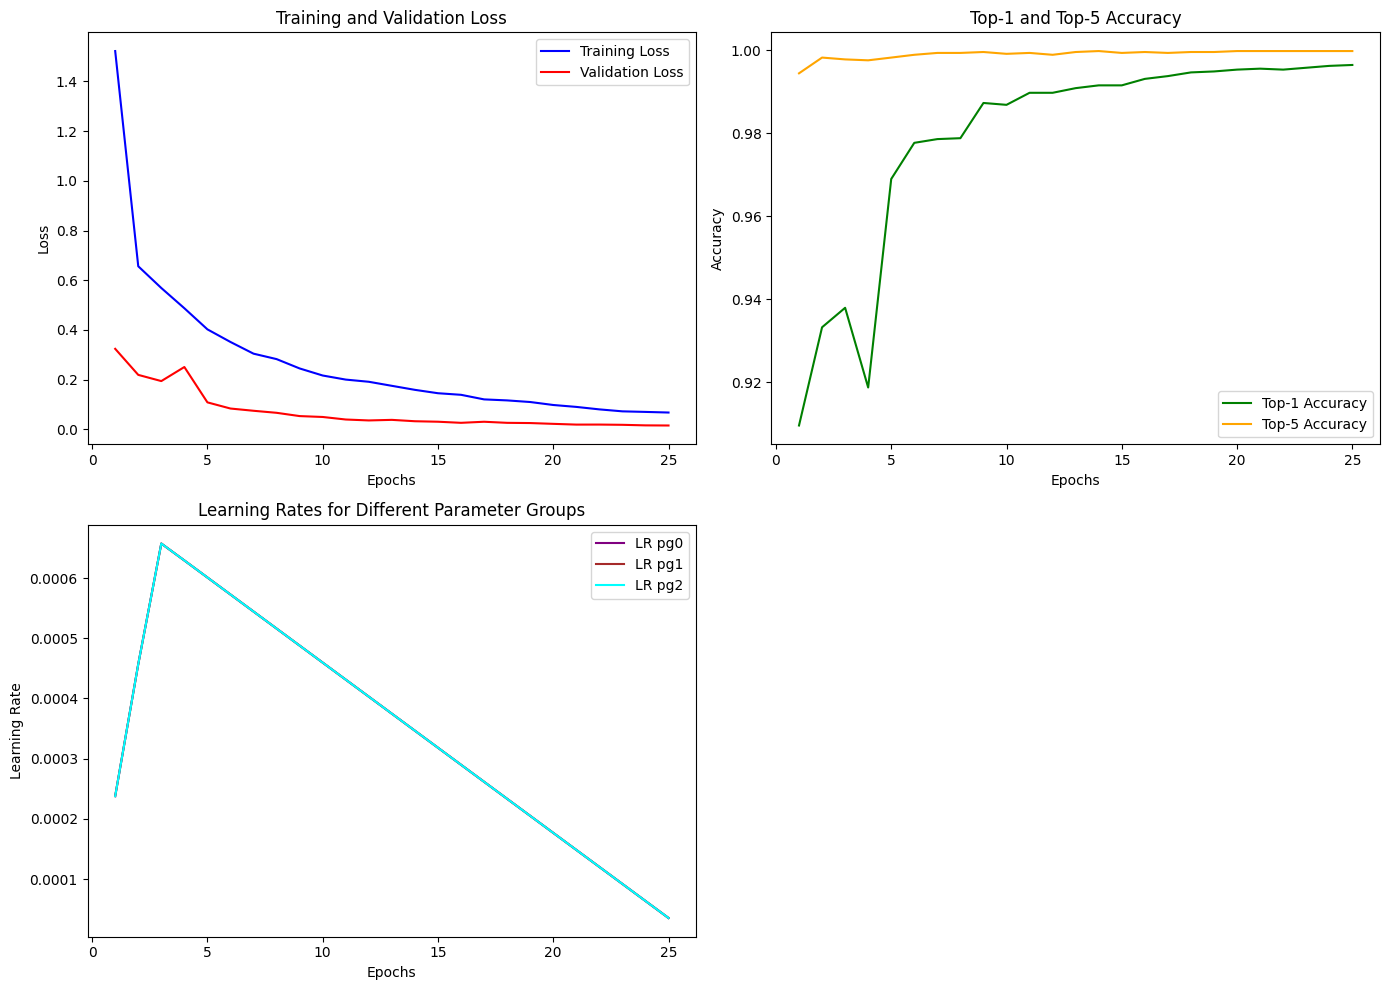

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV results file
results_path = '/content/drive/MyDrive/datascience/runs/classify/train3/results.csv'
results = pd.read_csv(results_path)

# Plotting
plt.figure(figsize=(14, 10))

# Subplot 1: Training and Validation Loss
plt.subplot(2, 2, 1)
plt.plot(results['epoch'], results['train/loss'], label='Training Loss', color='blue')
plt.plot(results['epoch'], results['val/loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Subplot 2: Top-1 and Top-5 Accuracy
plt.subplot(2, 2, 2)
plt.plot(results['epoch'], results['metrics/accuracy_top1'], label='Top-1 Accuracy', color='green')
plt.plot(results['epoch'], results['metrics/accuracy_top5'], label='Top-5 Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Top-1 and Top-5 Accuracy')
plt.legend()

# Subplot 3: Learning Rates (for parameter groups)
plt.subplot(2, 2, 3)
plt.plot(results['epoch'], results['lr/pg0'], label='LR pg0', color='purple')
plt.plot(results['epoch'], results['lr/pg1'], label='LR pg1', color='brown')
plt.plot(results['epoch'], results['lr/pg2'], label='LR pg2', color='cyan')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rates for Different Parameter Groups')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#model load
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/datascience/runs/classify/train3/weights/best.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



image 1/1 /content/462571617_2015709385594831_7943216827812566330_n.jpg: 64x64 c3 0.46, c9 0.22, c8 0.12, c5 0.10, c0 0.04, 25.4ms
Speed: 29.7ms preprocess, 25.4ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
Boxes:  None
Class Probabilities:  ultralytics.engine.results.Probs object with attributes:

data: tensor([0.0437, 0.0146, 0.0064, 0.4583, 0.0040, 0.1011, 0.0019, 0.0322, 0.1160, 0.2217])
orig_shape: None
shape: torch.Size([10])
top1: 3
top1conf: tensor(0.4583)
top5: [3, 9, 8, 5, 0]
top5conf: tensor([0.4583, 0.2217, 0.1160, 0.1011, 0.0437])


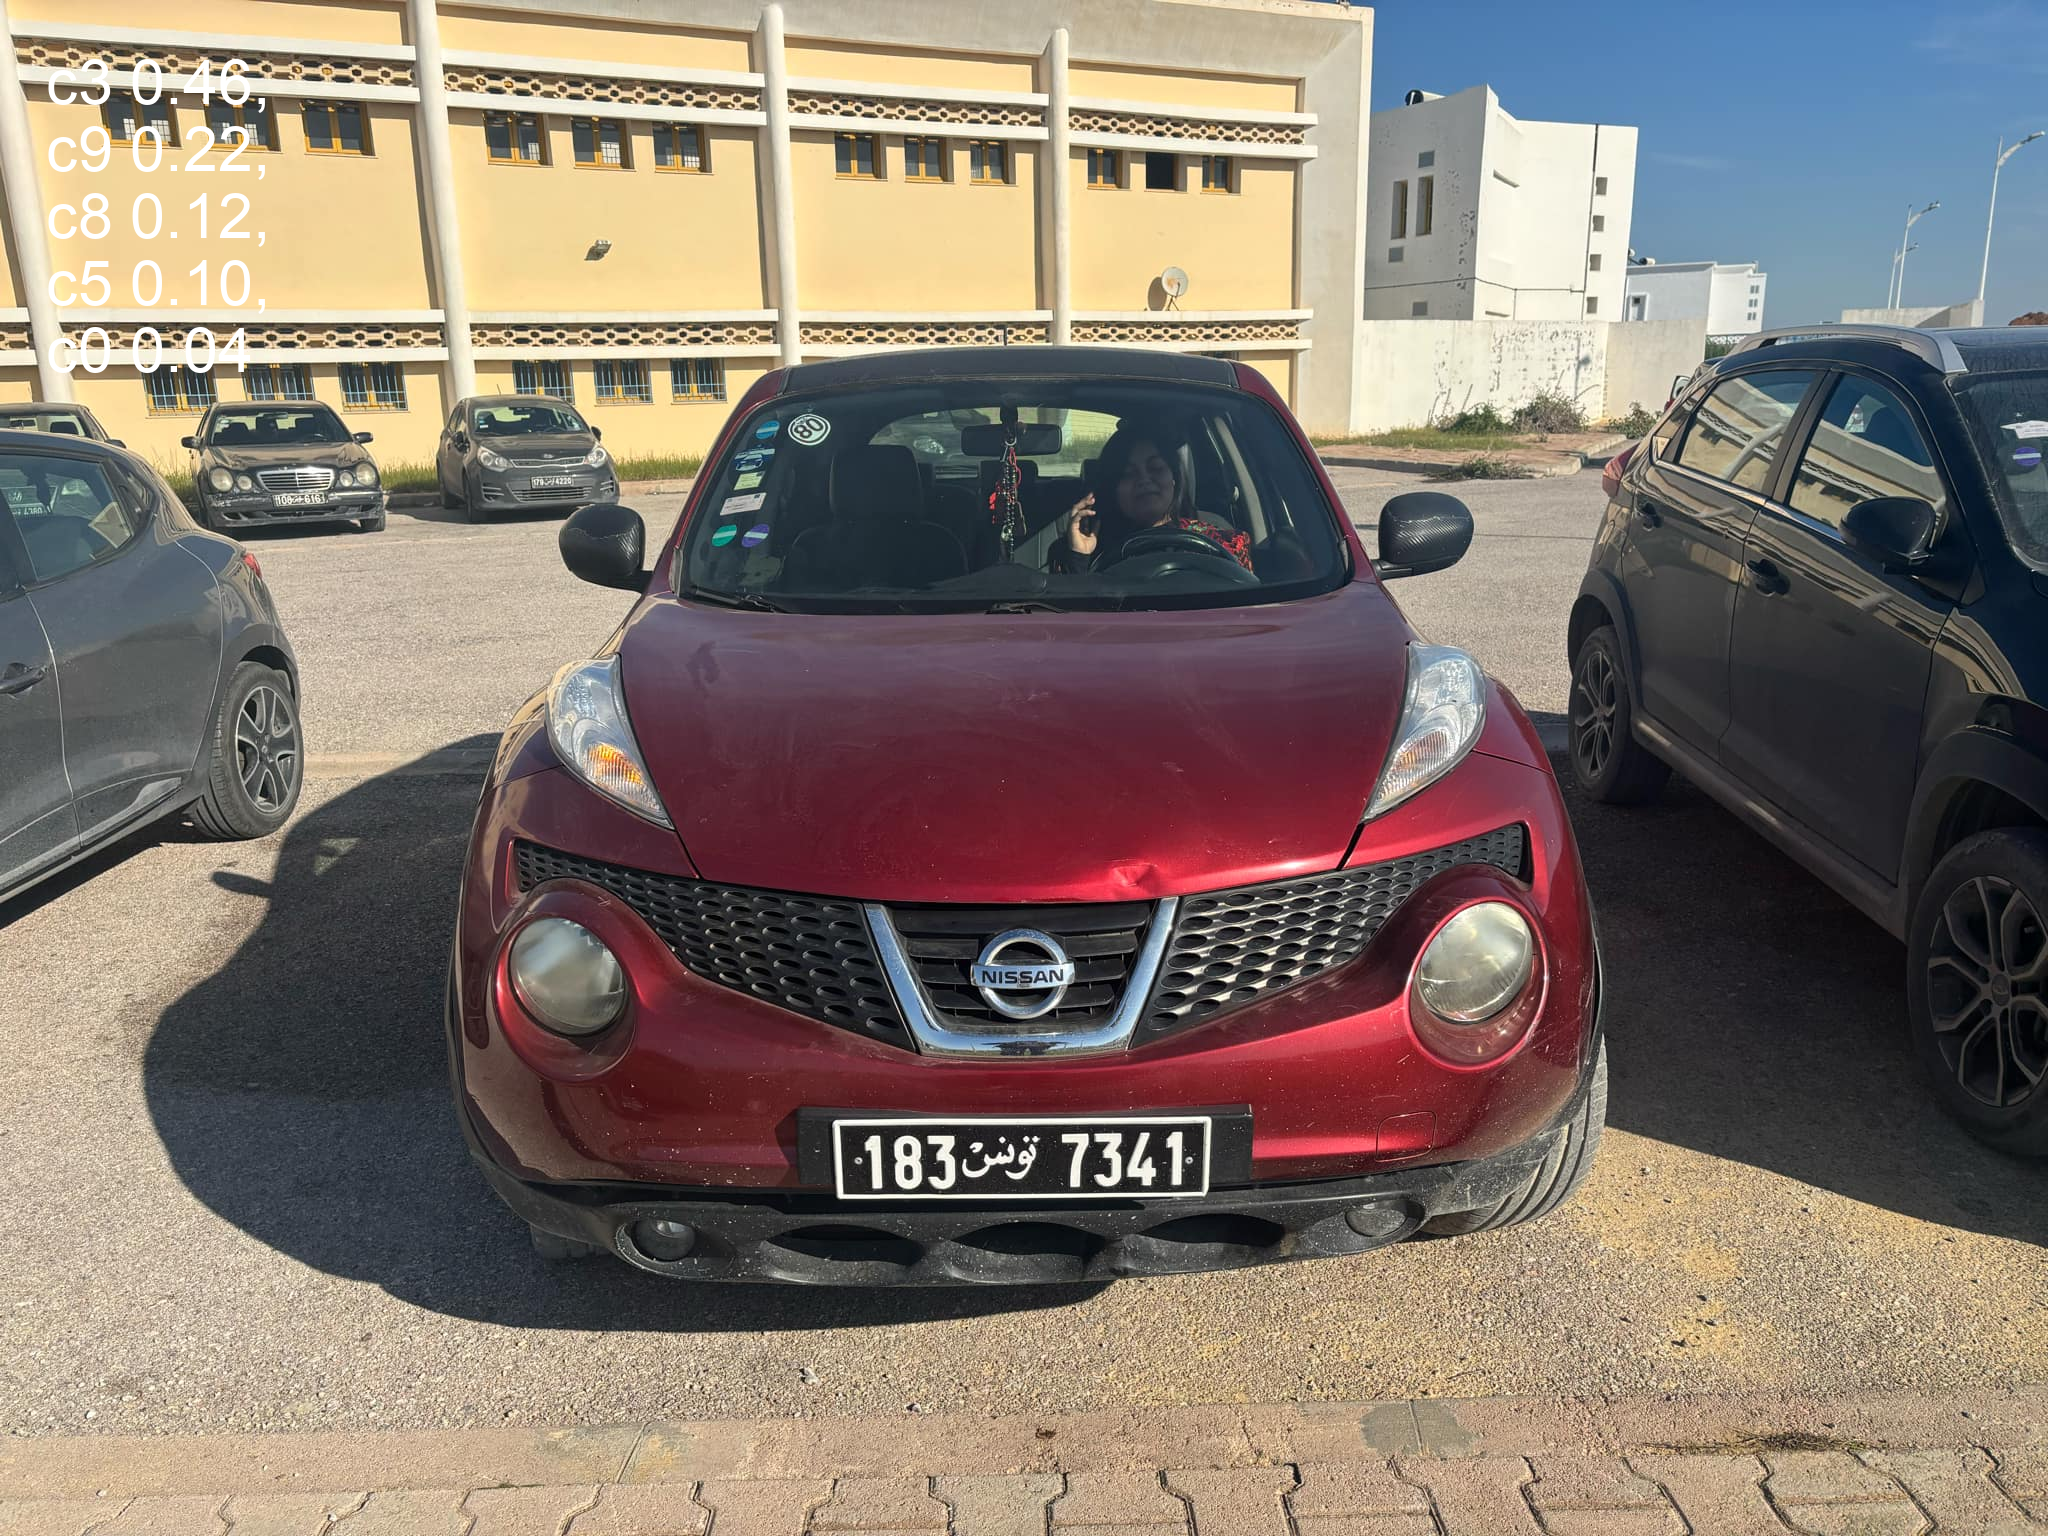

In [ ]:
import pandas
# Path to the image you want to test
image_path = '/content/462571617_2015709385594831_7943216827812566330_n.jpg'  # Replace with the actual path to the image

# Assuming 'results' is a list of result objects for each image
results = model(image_path)

# Loop through each result
for result in results:
    # Get bounding boxes and associated class probabilities for classification tasks
    boxes = result.boxes
    probs = result.probs  # For classification probabilities

    # Print the bounding boxes (if available)
    print("Boxes: ", boxes)

    # Print the probabilities (class probabilities for classification)
    print("Class Probabilities: ", probs)

    # Show the image with bounding boxes and class labels
    result.show()


In [ ]:

mapping = {
    'c0': 'safe driving',
    'c1': 'texting right',
    'c2': 'talking on the phone right',
    'c3': 'texting left',
    'c4': 'talking on the phone left',
    'c5': 'operating the radio',
    'c6': 'drinking',
    'c7': 'reaching behind',
    'c8': 'hair and makeup',
    'c9': 'talking to passenger',
}